<a href="https://colab.research.google.com/github/mahsaghaderan99/MLP/blob/cnn/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install ipython-autotime
%load_ext autotime

time: 128 µs


In [5]:
import tensorflow as tf
from os import path, getcwd, chdir
path = f"{getcwd()}/mnist.npz"
import matplotlib.pyplot as plt
import sklearn.model_selection as sk
import numpy as np
from skimage.util import random_noise
from scipy import spatial

#Load dataset

In [6]:
# def train_mnist_conv():  
class Mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch,logs={}):
      if logs.get('accuracy')>=0.998:
          self.model.stop_training = True

callbacks = Mycallback() 

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.


In [7]:
cat_training_labels = tf.keras.utils.to_categorical(
    training_labels, num_classes=10, dtype='float32'
)
cat_test_labels = tf.keras.utils.to_categorical(
    test_labels, num_classes=10, dtype='float32'
)

#CNN model

In [21]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=training_images.shape[1:]),
  tf.keras.layers.MaxPooling2D(3,3),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=training_images.shape[1:]),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


time: 84 ms


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 16)          4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 144)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

#Non Cross validation

In [160]:
history = model.fit(
    training_images,training_labels,validation_split = 0.2,epochs=40 ,callbacks =[callbacks]
)
print(model.evaluate(test_images, test_labels))
# return history.epoch, history.history['accuracy'][-1]
%load_ext autotime

Epoch 1/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4301 - accuracy: 0.8587 - val_loss: 0.0930 - val_accuracy: 0.9722
Epoch 2/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1640 - accuracy: 0.9494 - val_loss: 0.0696 - val_accuracy: 0.9784
Epoch 3/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1306 - accuracy: 0.9596 - val_loss: 0.0538 - val_accuracy: 0.9848
Epoch 4/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1123 - accuracy: 0.9650 - val_loss: 0.0504 - val_accuracy: 0.9853
Epoch 5/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1007 - accuracy: 0.9692 - val_loss: 0.0490 - val_accuracy: 0.9853
Epoch 6/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0936 - accuracy: 0.9708 - val_loss: 0.0440 - val_accuracy: 0.9866
Epoch 7/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0859 - accuracy: 0.9735 - val_loss: 0.0433 - val_accuracy:

In [161]:
test_history = model.evaluate(x=test_images,y=test_labels )
%load_ext autotime

313/313 [==============================] - 1s 2ms/step - loss: 0.0270 - accuracy: 0.9917
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 740 ms


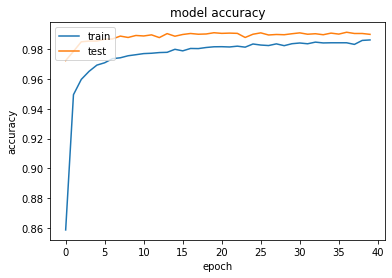

time: 152 ms


In [162]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Cross validation

In [163]:
X = np.append(training_images,test_images,axis=0)
Y = np.append(training_labels,test_labels)

time: 92.4 ms


In [166]:
seed = 7
np.random.seed(seed)
kfold = sk.StratifiedKFold(n_splits=7, shuffle=True, random_state=seed)

cvscores = []
step = 0
acc = 0
for train, test in kfold.split(X, Y):	
  model.fit(X[train], Y[train],validation_split = 0.2,epochs=40 ,callbacks =[callbacks])
  scores = model.evaluate(X[test], Y[test], verbose=0)
  print("step {0} ----- {1} is {2}".format(step,model.metrics_names[1], scores[1]*100))
  step += 1
  cvscores.append(scores[1] * 100)
print("The average of the model accuracy is {0} (+/- {1})".format(np.mean(cvscores), np.std(cvscores)))

Epoch 1/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0520 - accuracy: 0.9842 - val_loss: 0.0269 - val_accuracy: 0.9921
Epoch 2/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0512 - accuracy: 0.9837 - val_loss: 0.0278 - val_accuracy: 0.9919
Epoch 3/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0521 - accuracy: 0.9831 - val_loss: 0.0254 - val_accuracy: 0.9921
Epoch 4/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0492 - accuracy: 0.9846 - val_loss: 0.0266 - val_accuracy: 0.9924
Epoch 5/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0518 - accuracy: 0.9848 - val_loss: 0.0264 - val_accuracy: 0.9915
Epoch 6/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0482 - accuracy: 0.9847 - val_loss: 0.0289 - val_accuracy: 0.9908
Epoch 7/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0472 - accuracy: 0.9853 - val_loss: 0.0263 - val_accuracy:

#Noise handeling


In [23]:
def make_noisydata(data,model,var,portion):
  noisy_data = np.empty(data.shape)
  if model == 'gaussian':
    for i in range(data.shape[0]):
      noisy_data[i] = random_noise(data[i],model,var = var)
  elif model == 's&p':
    for i in range(data.shape[0]):
      noisy_data[i] = random_noise(data[i],model,amount=portion)
  return noisy_data

time: 3.53 ms


In [24]:
def add_noise(model= 'gaussian',var=0.5,portion=0.2):
  noisy_train = make_noisydata(training_images,model,var,portion)
  noisy_test = make_noisydata(test_images,model,var,portion)
  return noisy_train,noisy_test


time: 2.38 ms


In [25]:
def RemoveNoise(model,epochs,train=True):
  history = model.fit(n_train,training_labels,validation_split = 0.2,epochs=epochs ,callbacks =[callbacks],shuffle=True)
  print('best accurasy on train data is:',model.evaluate(training_images, training_labels)[1],)
  print('best accurasy on test data is:',model.evaluate(test_images, test_labels)[1],)
  return history

time: 6.23 ms


In [26]:
n_train, n_test = add_noise(model= 'gaussian',var=0.4,portion=0.2)
best_model = RemoveNoise(model,epochs=35)

Epoch 1/35
1500/1500 [==============================] - 4s 3ms/step - loss: 1.0177 - accuracy: 0.6507 - val_loss: 0.4694 - val_accuracy: 0.8503
Epoch 2/35
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6200 - accuracy: 0.7946 - val_loss: 0.3597 - val_accuracy: 0.8924
Epoch 3/35
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5563 - accuracy: 0.8169 - val_loss: 0.3126 - val_accuracy: 0.9024
Epoch 4/35
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5158 - accuracy: 0.8312 - val_loss: 0.3274 - val_accuracy: 0.8947
Epoch 5/35
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4883 - accuracy: 0.8411 - val_loss: 0.2926 - val_accuracy: 0.9075
Epoch 6/35
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4695 - accuracy: 0.8461 - val_loss: 0.2700 - val_accuracy: 0.9126
Epoch 7/35
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4575 - accuracy: 0.8505 - val_loss: 0.2736 - val_accuracy:

In [11]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
  plt.rcParams['figure.figsize'] = (wr, hr)
  for i in range(len(img_list)):
      plt.subplot(r, w, i + 1)
      if img_list[i][2] == 'img':
          if gray:
              plt.imshow(img_list[i][0], cmap = 'gray')
          else:
              plt.imshow(img_list[i][0])
          plt.xticks([])
          plt.yticks([])
      elif img_list[i][2] == 'hist':
          plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
      else:
          raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
      plt.title(img_list[i][1])
  if fig_name is not None:
      plt.savefig(fig_name + '.png')
  plt.show()

In [12]:
def checktestsample(model,sample):
  m = test_images[0].shape[0]
  n = test_images[0].shape[1]
  y_pred = model.predict(np.array([n_test[sample]]))
  image_list = []
  image_list.append([test_images[sample].reshape((m,n)), 'Original Test Image', 'img'])
  image_list.append([n_test[sample].reshape((m,n)), 'Noisy Test Image', 'img'])
  print('preditction is',np.argmax(y_pred))
  plotter(image_list,1,2 ,True,10,10)

preditction is 7


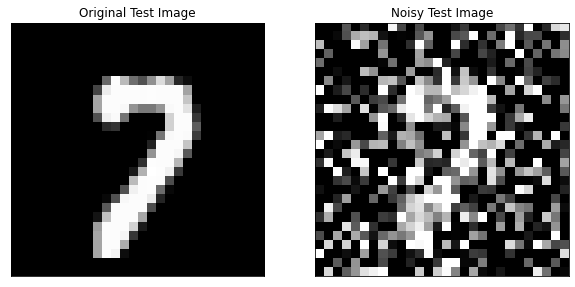

In [56]:
checktestsample(model,7334)

#New model (more robust)

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=training_images.shape[1:]),
  tf.keras.layers.MaxPooling2D(3,3),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=training_images.shape[1:]),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dropout (Dropout)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               7

In [28]:
#if the next step is not run in nosie handling part you should uncomment it
# n_train, n_test = add_noise(model= 'gaussian',var=0.4,portion=0.2)
best_model = RemoveNoise(model,epochs=75)

Epoch 1/75
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3829 - accuracy: 0.8726 - val_loss: 0.2493 - val_accuracy: 0.9190
Epoch 2/75
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3789 - accuracy: 0.8746 - val_loss: 0.2392 - val_accuracy: 0.9239
Epoch 3/75
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3786 - accuracy: 0.8764 - val_loss: 0.2360 - val_accuracy: 0.9231
Epoch 4/75
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3728 - accuracy: 0.8760 - val_loss: 0.2437 - val_accuracy: 0.9230
Epoch 5/75
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3783 - accuracy: 0.8748 - val_loss: 0.2447 - val_accuracy: 0.9226
Epoch 6/75
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3754 - accuracy: 0.8752 - val_loss: 0.2543 - val_accuracy: 0.9163
Epoch 7/75
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3712 - accuracy: 0.8776 - val_loss: 0.2437 - val_accuracy:

preditction is 7


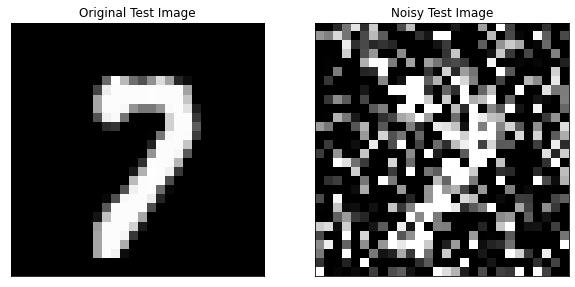

time: 240 ms


In [27]:
checktestsample(model,7334)